<a href="https://colab.research.google.com/github/Binary-Digits/TensorFlows/blob/main/MNIST_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Acquisition**

**Importing Modules**

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np


In [2]:
# loading data sets
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
print(train_labels[0])

5


In [4]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# **Data Preprocessing and Visualization**

In [5]:
# convert labels to one-hot codes
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

print(train_labels[0])
print(train_labels.shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)


Data Visualization

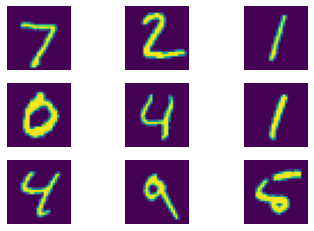

In [6]:

plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(test_images[i])
  plt.axis('off')
plt.show()


Data Preprocessing

In [7]:
# convert 28 x 28 image to 784 x 1 vector
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

train_images.shape
test_images.shape

train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
# normalize image pixel values
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **Model Construction**


Building a CNN Model

In [9]:
# CNN Construction

model = keras.Sequential()
# 1st convolutional layer
model.add(layers.Conv2D(filters=32, kernel_size=5, strides=(1, 1),
                        input_shape=(28, 28, 1), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
# 2nd convolutional layer
model.add(layers.Conv2D(filters=64, kernel_size= 3, strides=(1, 1),
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# add drop out layer
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())

# add two fully connected layers
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=10, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

Compiling and Training the Model

In [10]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])
# train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 55s 117ms/step - loss: 0.2998 - accuracy: 0.9068
Epoch 2/5
469/469 [==============================] - 48s 101ms/step - loss: 0.0975 - accuracy: 0.9704
Epoch 3/5
469/469 [==============================] - 49s 104ms/step - loss: 0.0707 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 48s 103ms/step - loss: 0.0583 - accuracy: 0.9827
Epoch 5/5
469/469 [==============================] - 50s 106ms/step - loss: 0.0502 - accuracy: 0.9850


Evaluating the model

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy is  %.2f"%test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0247 - accuracy: 0.9911
Test Accuracy is  0.99


Saving the Model

In [12]:
model.save("./model/final_CNN_model.h5")

# **Prediction Result Visualization**

Loading the CNN Model

In [14]:
from tensorflow.keras.models import load_model
new_model = load_model("./model/final_CNN_Model.h5") #"use_your_path/final_CNN_Model.h5"

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

Visualize prediction results

prediction results of the first 20 images:
[1.2490685e-09 1.9438705e-10 4.1487058e-07 1.4178889e-07 4.9533846e-11
 2.5933033e-11 5.9110052e-14 9.9999809e-01 3.2941333e-10 1.3990045e-06],[1.8358693e-07 7.6803699e-05 9.9992239e-01 1.3679723e-09 9.7239434e-09
 4.3774397e-11 3.1320189e-07 1.6749688e-09 2.3660257e-07 8.9441933e-11],[2.6506381e-08 9.9997771e-01 6.1672489e-07 5.4887156e-08 1.2786390e-05
 4.4906903e-07 9.6932513e-07 6.5968384e-06 4.2593257e-07 3.3454637e-07],[9.9994886e-01 1.0005229e-08 5.1535643e-08 8.5052836e-09 3.7715719e-08
 1.6444661e-08 4.7937679e-05 9.3023992e-08 4.3323777e-07 2.5401559e-06],[1.5627080e-08 2.6013211e-07 4.2913918e-08 3.0169019e-08 9.9947923e-01
 8.3746990e-08 3.2178937e-07 2.0742567e-07 1.2144163e-07 5.1968038e-04],	
[1.8791628e-09 9.9999630e-01 3.3237495e-08 1.1518839e-09 2.2997949e-06
 5.1468709e-09 5.0453895e-08 1.1697407e-06 3.5260474e-08 5.6259516e-08],[2.6655973e-09 4.8813449e-06 7.6014963e-08 1.1988744e-08 9.9907184e-01
 8.4575447e-07 3.8382188e-

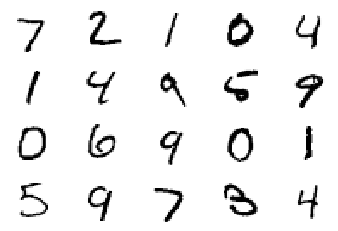

In [19]:
# visualize prediction results
import matplotlib.pyplot as plt

def res_Visual(n):
  final_opt_a = model.predict(test_images[0:n]) # perform predictions on the test tests by using the model
  fig, ax = plt.subplots(nrows=int(n/5), ncols=5)
  ax = ax.flatten()
  print('prediction results of the first {} images:'.format(n))
  for i in range(n):
    print(final_opt_a[i], end=',')
    if int((i + 1) % 5) == 0:
      print("\t")

    #visualize image display
    img = test_images[i].reshape((28, 28)) #read each row of data in the format of Ndarry
    plt.axis('off')
    ax[i].imshow(img, cmap='Greys', interpolation='nearest') #visualization
    ax[i].axis("off")
  print("first {} images in the test set".format(n))  
res_Visual(20)